The objective in this excersize is analyze a dataset by performing PCA and linear regression.

Complete the relevant code after the corresponding cells.

Then upload the notebook to elearn.

Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

Load the california housing dataset

In [ ]:
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target
print(df.columns)
data = df.to_numpy()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


Visualize the data e.g. *correlation matrices*, *scatterplots*, something else


<Axes: >

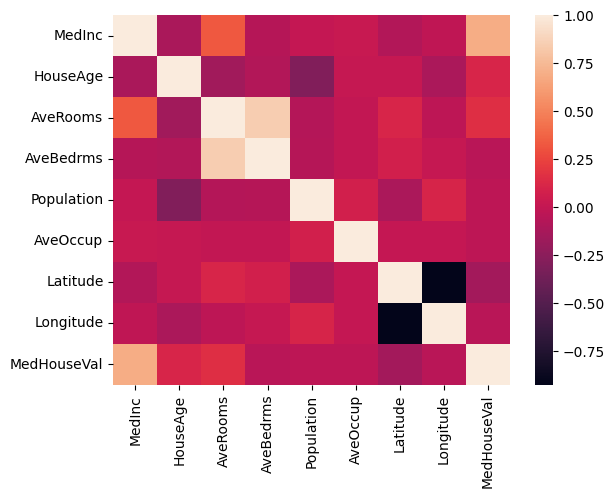

In [ ]:
houses_hm = df.corr()
sns.heatmap(houses_hm)

split the data to training (80%) and test (20%) sets
and standarize the features if necessary

In [ ]:
train, test = train_test_split(data, test_size = 0.2)

#Get the mean and standard deviation rows
train_means = np.mean(train, axis=0)
train_dev = np.std(train, axis=0)
test_means = np.mean(test, axis=0)
test_dev = np.std(test, axis=0)

train_std= np.zeros(train.shape)
test_std = np.zeros(test.shape)

for i in range(len(train)):
  for j in range(len(train_means)):
    train_std[i][j] = (train[i][j] - train_means[j])/train_dev[j]

for i in range(len(test)):
  for j in range(len(test_means)):
    test_std[i][j] = (test[i][j] - test_means[j])/test_dev[j]

perform PCA to reduce the number of features

In [ ]:
pca2 = PCA(n_components=2)
pca3 = PCA(n_components=3)

pca2.fit(train_std)
train2d = pca2.transform(train_std)
result2d = pca2.transform(test_std)

pca3.fit(train_std)
train3d = pca3.transform(train_std)
result3d = pca3.transform(test_std)

provide scatterplots for the case of projections in 2 and 3 dimensions

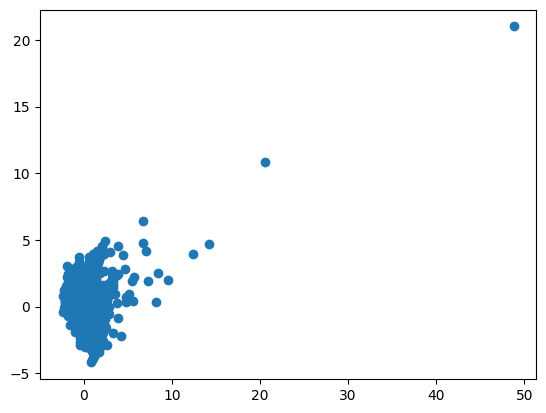

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


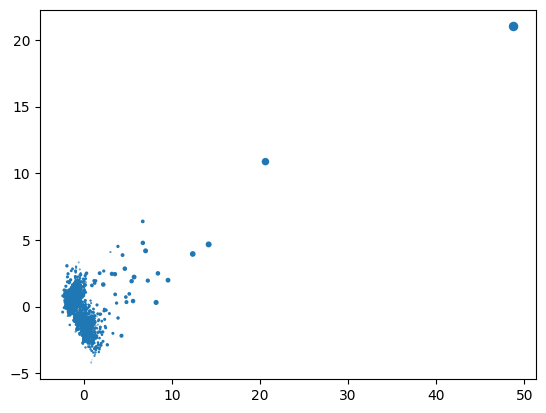

In [ ]:
plt.scatter(result2d[:,0], result2d[:,1])
plt.show()

plt.scatter(result3d[:,0], result3d[:,1], result3d[:,2])
plt.show()

perform linear regression using the original features

In [ ]:
train_target = train_std[:,8]
test_target = test_std[:,8]

reg = LinearRegression().fit(train_std, train_target)

Score with original features: 1.0


perform linear regression using PCA-reduced features

In [ ]:
reg2 = LinearRegression().fit(train2d, train_target)
reg3 = LinearRegression().fit(train3d, train_target)

Compare the perfornance of linear regression on the original vs the PCA features

In [16]:
print("Score with original features:", reg.score(test_std, test_target))
r2score = reg2.score(result2d, test_target)
r3score = reg3.score(result3d, test_target)

print("Score with 2 Principal Components", r2score)
print("Score with 3 Principal Components", r3score)

Score with original features: 1.0
Score with 2 Principal Components 0.33999309770868213
Score with 3 Principal Components 0.8428969783342948


Quantify the impact of the number of principal components on the regression
?

In [18]:
print("The comparative performance is", r3score/r2score, "times better with 3 components when compared with only 2")

"""In more general terms, with 2 Principal Components, only ~34% of the variance around the mean is captured.
   With 3 Principal Components, ~84% of the variance is captured. In other words, compared to simply taking
   the mean of the target value, using 2 Principal Components to discern its value the variance is reduced by a third.
   For 3 Principal Components, the variance is reduced by about five sixths."""

The comparative performance is 2.4791590888604396 times better with 3 components when compared with only 2


'In more general terms, with 2 Principal Components, only ~34% of the variance around the mean is captured.\n   With 3 Principal Components, ~84% of the variance is captured. In other words, compared to simply taking\n   the mean of the target value, using 2 Principal Components to discern its value the variance is reduced by a third.\n   For 3 Principal Components, the variance is reduced by about five sixths.'